In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore harmless warnings:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.titlesize'] = 22
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
pd.options.display.max_columns = 1000

In [2]:
# Data Read:
df = pd.read_csv('data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# Get df info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# PREPROCESSING

In [4]:
# Binerize 2-value categorical variables:
def binarize_categorical(target_col: str, df: pd.DataFrame) -> None:
    """Binerize the categorical variables. (Data preprocessing)"""

    # One-hot-encoding:
    temp = pd.get_dummies(data=df[target_col], prefix=target_col,
                         prefix_sep='_', drop_first=True)

    # Change type to bool:
    temp = temp.astype(dtype=np.int8)
    
    # Remove the original target column and update the DataFrame:
    df.drop(columns=target_col, inplace=True)
    
    # Add the encoded column(s) back to the DataFrame:
    df[temp.columns] = temp

    return None

In [5]:
# Binerize target variables:
targets = ['Gender', 'Attrition', 'OverTime']
for target in targets:
    binarize_categorical(target_col=target, df=df)

df['Over18'] = True # This one is true for all.

In [6]:
# Observe teh modified data:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,94,3,2,Sales Executive,4,Single,5993,19479,8,True,11,3,1,80,0,8,0,1,6,4,0,5,0,1,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,61,2,2,Research Scientist,2,Married,5130,24907,1,True,23,4,4,80,1,10,3,3,10,7,1,7,1,0,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,92,2,1,Laboratory Technician,3,Single,2090,2396,6,True,15,3,2,80,0,7,3,3,0,0,0,0,1,1,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,56,3,1,Research Scientist,3,Married,2909,23159,1,True,11,3,3,80,0,8,3,3,8,7,3,0,0,0,1
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,True,12,3,4,80,1,6,3,3,2,2,2,2,1,0,0


In [7]:
# One-hot-encoding for the more than 2 categorical types:
def one_hot_encode(target_col: str, df: pd.DataFrame) -> pd.DataFrame:
    """One-hot-encode and update original df"""

    # one-hot-encode the target column:
    encoded = pd.get_dummies(data=df[target_col],
                            prefix=target_col,
                            prefix_sep='_',
                            drop_first=True).astype(dtype=np.int8)

    # Drop original column:
    df = df.drop(columns=target_col)
    
    # Join encoded to original df:
    df = df.join(encoded)
    
    return df

In [8]:
# Execute function for all target columns:
one_hot_targets = ['BusinessTravel', 'Department', 'EducationField',
                  'JobRole', 'MaritalStatus']

for target in one_hot_targets:
    df = one_hot_encode(target_col=target, df=df)

In [9]:
# See the updated data:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,True,11,3,1,80,0,8,0,1,6,4,0,5,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,True,23,4,4,80,1,10,3,3,10,7,1,7,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,True,15,3,2,80,0,7,3,3,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,True,11,3,3,80,0,8,3,3,8,7,3,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,True,12,3,4,80,1,6,3,3,2,2,2,2,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


# EDA

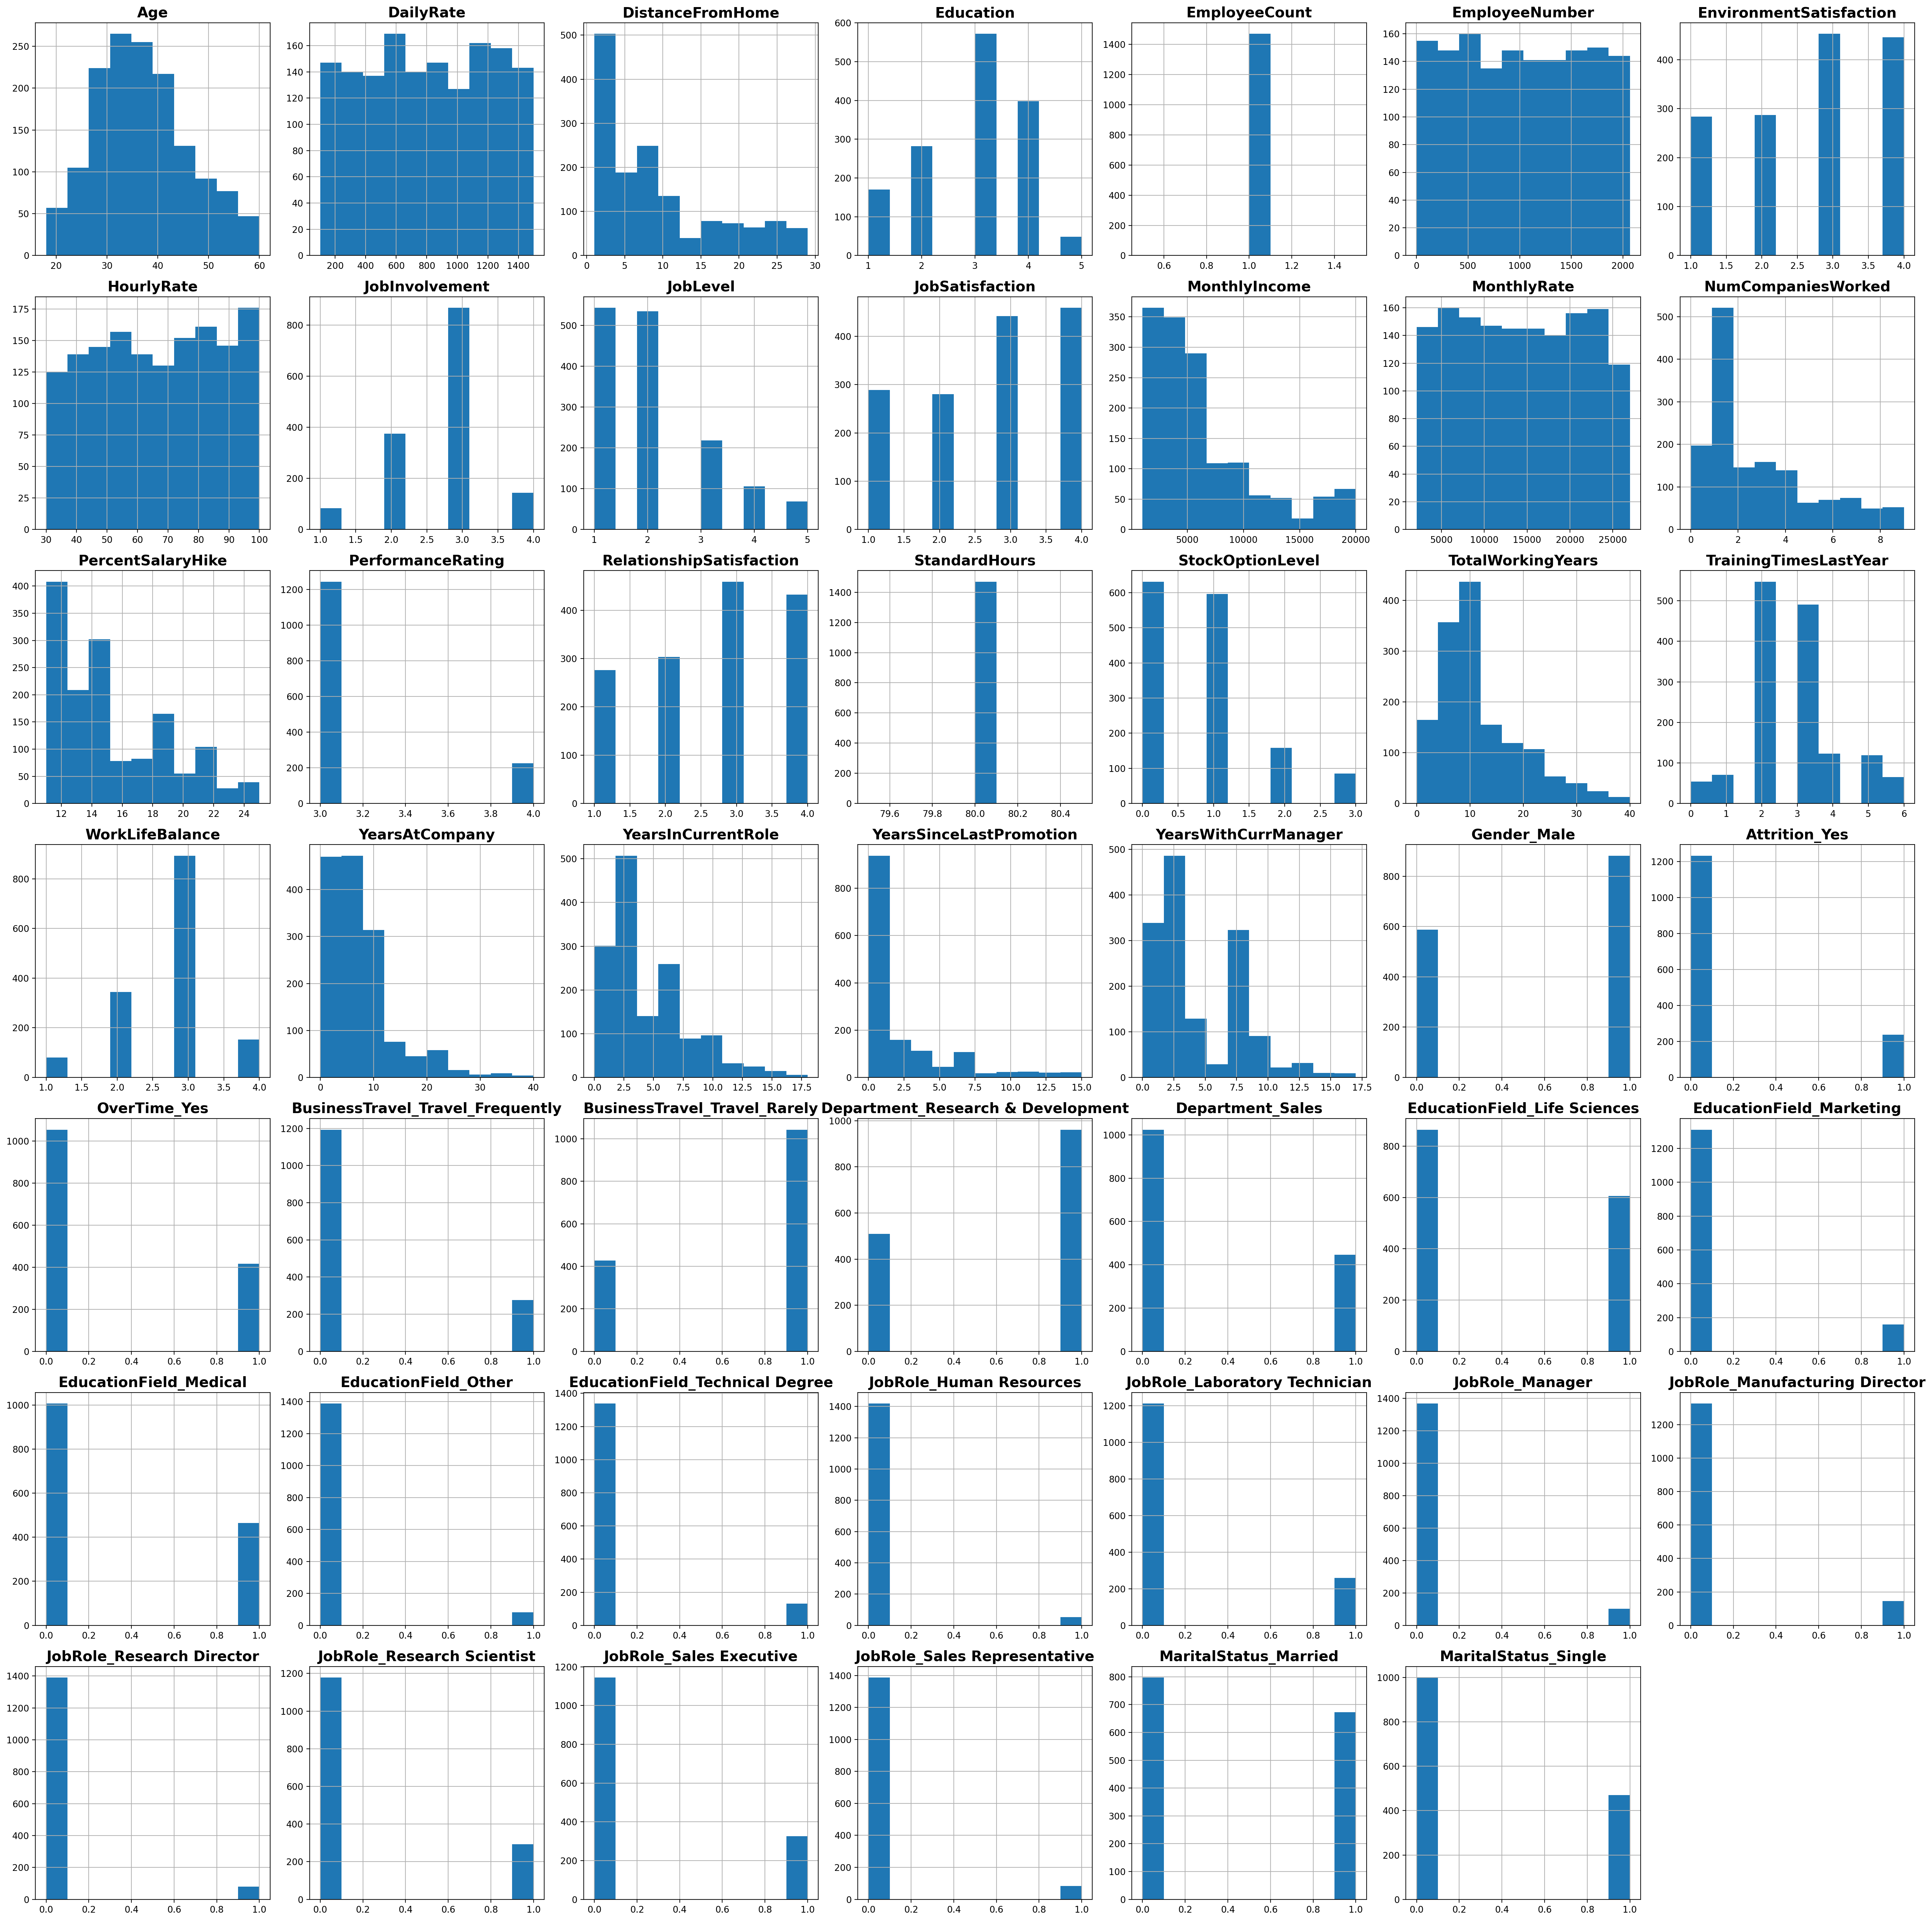

In [10]:
# Get information regarding general distributions:
fig = plt.figure(figsize=(30, 30), dpi=200)
ax = fig.add_subplot()
df.hist(ax=ax)
fig.tight_layout()
plt.show()

In [11]:
# Get the highest correlation for the Attrition:
corr_data = df.corr()
high_corr_with_target = np.abs(corr_data['Attrition_Yes'])\
    .sort_values(ascending=False).head(6).index.tolist()

print(np.abs(corr_data['Attrition_Yes'])\
    .sort_values(ascending=False))

Attrition_Yes                        1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
TotalWorkingYears                    0.171063
JobLevel                             0.169105
YearsInCurrentRole                   0.160545
MonthlyIncome                        0.159840
Age                                  0.159205
JobRole_Sales Representative         0.157234
YearsWithCurrManager                 0.156199
StockOptionLevel                     0.137145
YearsAtCompany                       0.134392
JobInvolvement                       0.130016
BusinessTravel_Travel_Frequently     0.115143
JobSatisfaction                      0.103481
EnvironmentSatisfaction              0.103369
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married                0.090984
JobRole_Research Director            0.088870
Department_Research & Development    0.085293
JobRole_Manager                      0.083316
JobRole_Manufacturing Director    

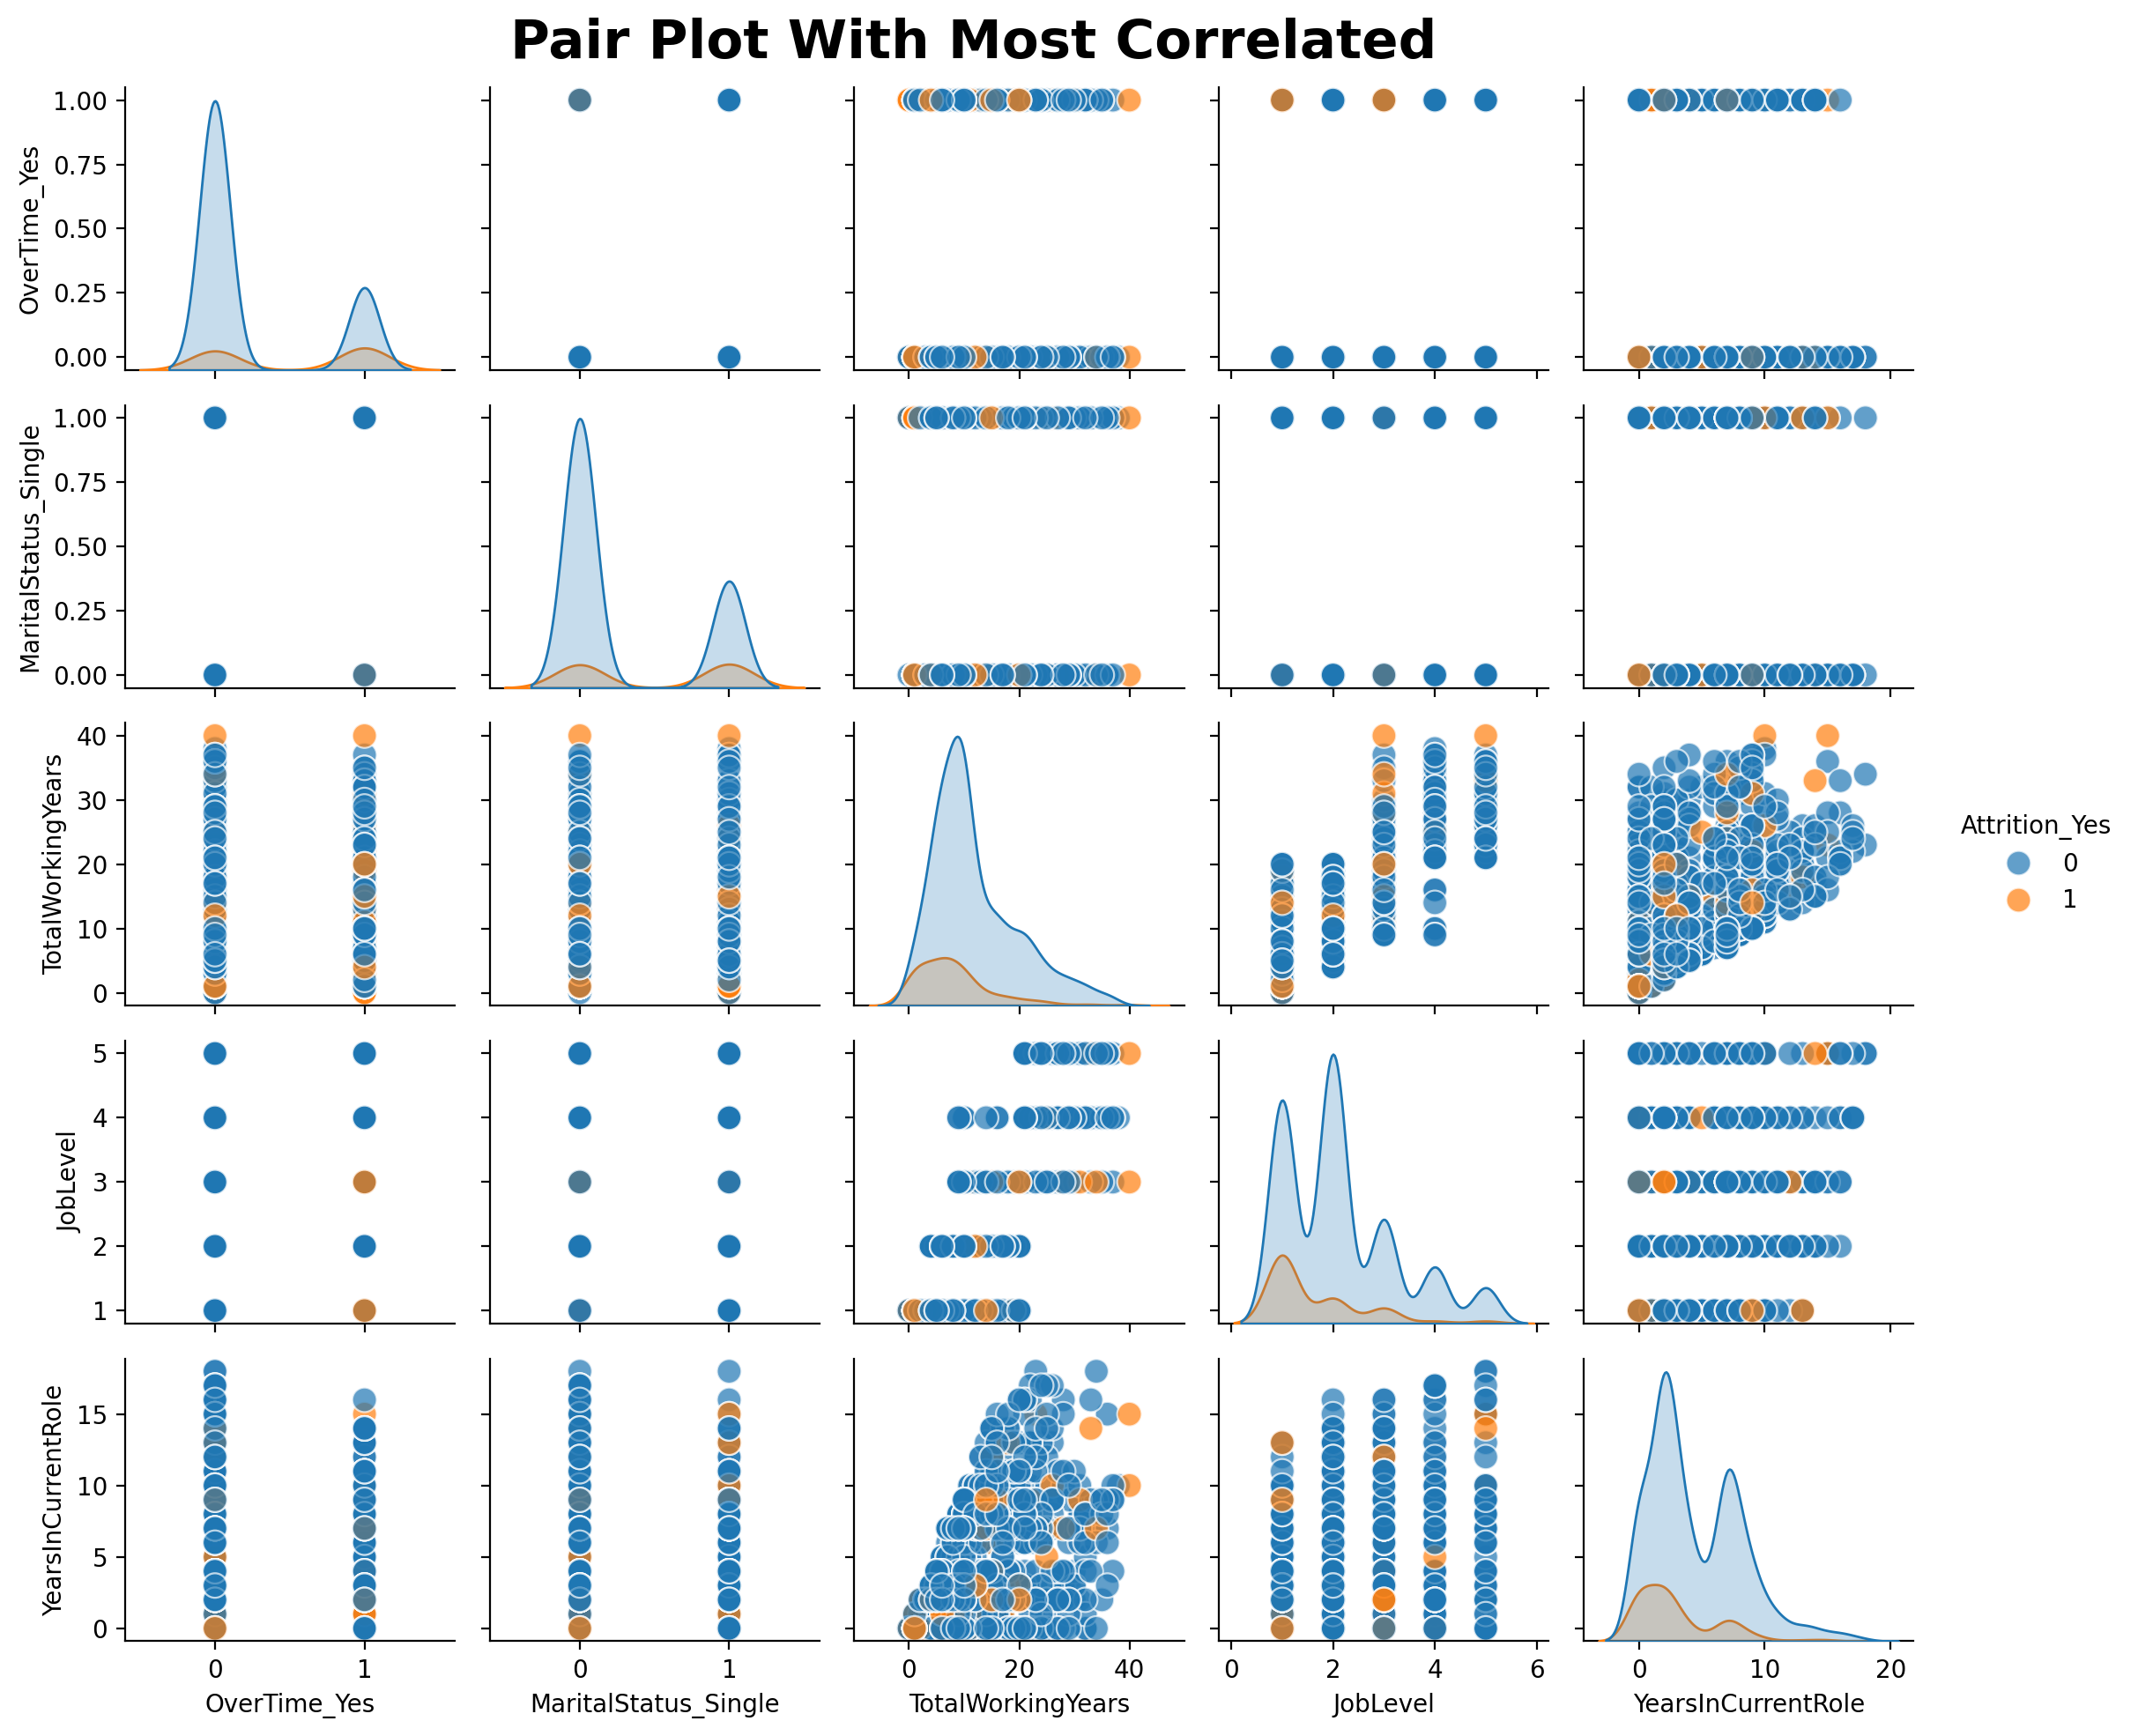

In [12]:
# Pair plot high correlation with the target:
pair_plot = sns.pairplot(data=df[high_corr_with_target],
                        hue='Attrition_Yes', plot_kws={'s': 100,
                                                      'alpha': 0.70})

pair_plot.figure.set_size_inches(10,10)
pair_plot.figure.set_dpi(200)
pair_plot.figure.suptitle(t='Pair Plot With Most Correlated')
pair_plot.legend.remove()
pair_plot.add_legend(bbox_to_anchor=(1.1, 0.5))
pair_plot.figure.tight_layout()
plt.show()

In [13]:
# Drop columns that does not contain any signal:
no_signal = ['EmployeeCount', 'StandardHours']
df = df.drop(columns=no_signal)

# MODEL TRAINING

In [14]:
# We use random forest classifier:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X, y = df.drop(columns='Attrition_Yes'), df['Attrition_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [15]:
model.score(X_test, y_test)

0.8163265306122449

In [16]:
pd.DataFrame(data=model.feature_importances_,
            columns=['Importance'],
            index=model.feature_names_in_).sort_values(by='Importance',
                                                      ascending=False)

,Importance
MonthlyIncome,0.065074
Age,0.055826
OverTime_Yes,0.055360
DailyRate,0.047938
TotalWorkingYears,0.046911
MonthlyRate,0.045722
HourlyRate,0.045511
DistanceFromHome,0.043437
EmployeeNumber,0.043322
YearsAtCompany,0.043073
